In [43]:
#Manejo de datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesado, metricas y modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, multilabel_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder


# Clasificación de cultivos


In [26]:
original_df = pd.read_csv('/Users/alessiobocco/Documents/Data_Science/Data_Challenges/DesafioAgTech2020/dataset/dataset_satelite_resumen_anual_estacional.csv') 

In [27]:
original_df.shape

(24058, 61)

In [28]:
#pd.get_dummies(original_df, columns=["Campania", "Dataset"]).head()
#original_df = pd.get_dummies(original_df, columns=["Campania"])

original_df.shape

(24058, 61)

Se eliminan las variables innecesarias

In [29]:
train = original_df[original_df.train == True].copy()
train = train.drop([ 'train', 'GlobalId', 'Id', 'Cultivo', 'Dataset', 'Tipo'], axis=1)
train = train.dropna()
train = train.reset_index(drop=True)

In [30]:
train.head()

,Elevacion,Campania,CultivoId,GNDVI_verano_sd,GNDVI_verano_median,GNDVI_primavera_sd,GNDVI_primavera_median,GNDVI_anual_sd,GNDVI_anual_max,GNDVI_anual_min,...,BSI_primavera_median,BSI_anual_sd,BSI_anual_max,BSI_anual_min,BSI_anual_median,BSI_anual_max_ind,BSI_otonio_sd,BSI_otonio_median,BSI_invierno_sd,BSI_invierno_median
0,104.111862,2018,1.0,0.263033,0.304989,0.154999,0.521685,0.199437,0.747500,0.191179,...,-0.980203,0.667579,0.206213,-1.609584,-0.372989,6,0.774087,-0.345889,0.191398,-0.315465
1,105.698082,2018,3.0,0.089612,0.678897,0.217821,0.248773,0.181309,0.684802,0.211679,...,0.134498,0.723366,0.258177,-1.756245,-0.184848,10,0.262168,-0.143351,0.141708,-0.007481
2,104.233162,2018,10.0,0.055191,0.304828,0.105040,0.295463,0.083535,0.387024,0.118949,...,-0.516452,0.284998,-0.118169,-1.252055,-0.577229,6,0.100714,-0.613482,0.327410,-1.020541
3,103.859932,2018,3.0,0.209129,0.344033,0.017482,0.268392,0.157356,0.677169,0.185515,...,0.002223,0.627408,0.125648,-1.811209,-0.124183,6,0.483511,-0.842071,0.064306,-0.124183
4,98.532104,2018,3.0,0.095629,0.457569,0.116310,0.417054,0.131609,0.551861,0.093768,...,-0.868556,0.381736,-0.038672,-1.045642,-0.389632,10,0.555443,-0.093482,0.131460,-0.258714


In [31]:
test = original_df[original_df.train == False]
test = test.drop([  'train', 'CultivoId', 'GlobalId', 'Id', 'Cultivo', 'Dataset', 'Tipo'], axis=1)
test.head()

,Elevacion,Campania,GNDVI_verano_sd,GNDVI_verano_median,GNDVI_primavera_sd,GNDVI_primavera_median,GNDVI_anual_sd,GNDVI_anual_max,GNDVI_anual_min,GNDVI_anual_median,...,BSI_primavera_median,BSI_anual_sd,BSI_anual_max,BSI_anual_min,BSI_anual_median,BSI_anual_max_ind,BSI_otonio_sd,BSI_otonio_median,BSI_invierno_sd,BSI_invierno_median
850,104.111862,2018,0.175349,0.674135,0.210587,0.247672,0.177647,0.683647,0.220515,0.333781,...,0.056273,0.667406,0.233312,-1.710840,-0.167851,10,0.232372,-0.149071,0.103916,-0.060317
851,105.698082,2018,0.090484,0.673137,0.176979,0.246753,0.184235,0.686376,0.212813,0.254225,...,0.157874,0.717319,0.212907,-1.856273,0.049041,10,0.161911,0.145057,0.096408,0.049041
852,104.233162,2018,0.182392,0.315774,0.017373,0.248593,0.145229,0.604434,0.161353,0.265695,...,0.024051,0.469010,0.146309,-1.194067,-0.222353,6,0.281841,-0.874385,0.097230,-0.222353
853,103.859932,2018,0.039744,0.531663,0.092715,0.472175,0.094607,0.571301,0.277832,0.481004,...,-0.276163,0.267022,0.026162,-0.837777,-0.364283,2,0.107504,-0.535158,0.062946,-0.018347
854,101.769859,2018,0.025519,0.483730,0.071111,0.409683,0.094792,0.512181,0.229230,0.424876,...,-0.470413,0.217588,-0.468139,-1.097718,-0.691919,3,0.146008,-0.716310,0.004366,-0.664441


In [32]:
test.shape

(555, 54)

In [33]:
labels = train.CultivoId
train = train.drop(['CultivoId'], axis=1)

Separamos en los set de train y test. Se consideran las distintas clases para así mantener la representatividad de cada una de las clases. 


In [34]:

X_train, X_test, y_train, y_test = train_test_split(
    train, labels, stratify=labels, random_state=42,
    test_size = 0.3, shuffle = True
)

In [35]:
X_train.shape, X_test.shape

((16451, 54), (7051, 54))

In [36]:
#campania_train = pd.get_dummies(X_train, columns=["Campania"])[['Campania_2019', 'Campania_2018']] 
#campania_test = pd.get_dummies(X_test, columns=["Campania"])[['Campania_2019', 'Campania_2018']] 

#X_train = X_train.drop(['Campania'], axis=1)
#X_test = X_test.drop(['Campania'], axis=1)

Se escalan los datos para evitar sesgos en la importancia de variables y se crean variables dummies para indicar cada una de las campañas agrícolas. 

In [37]:
scaler = preprocessing.StandardScaler().fit(X_train.loc[:, X_train.columns != 'Campania'])
X_train.loc[:, X_train.columns != 'Campania'] = scaler.transform(X_train.loc[:, X_train.columns != 'Campania'])
X_train = pd.get_dummies(X_train, columns=["Campania"])

# Standarize test dataset
X_test.loc[:, X_test.columns != 'Campania'] = scaler.transform(X_test.loc[:, X_test.columns != 'Campania'])
X_test = pd.get_dummies(X_test, columns=["Campania"])

/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Se transforman también los datos de test con el modelo usado para train. 

In [38]:
test.loc[:, test.columns != 'Campania'] = scaler.transform(test.loc[:, test.columns != 'Campania'])
test = pd.get_dummies(test, columns=["Campania"])

Existen diversas estrategias para tratar con un dataset tan desbalanceado 

Se define una función para el cálculo de dos scorings: accuracy y balanced accuracy. 


In [39]:
def evaluate_classifier(clf, df_scores, clf_name=None):
    from sklearn.pipeline import Pipeline
    if clf_name is None:
        if isinstance(clf, Pipeline):
            clf_name = clf[-1].__class__.__name__
        else:
            clf_name = clf.__class__.__name__
    acc = clf.fit(X_train, y_train).score(X_test, y_test)
    y_pred = clf.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    clf_score = pd.DataFrame(
        {clf_name: [acc, bal_acc]},
        index=['Accuracy', 'Balanced accuracy']
    )
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores


# Let's define an empty dataframe to store the results
df_scores = pd.DataFrame()

Clasificador lineal (benchmark)
..........................

Se crea un Pipeline usando `LogisticRegression` como clasificador. En este sentido, se usará one-hot_encoding para alguna variable categóricas (Si las hubiese).

In [40]:
num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore")
)

Luego se crea un proprocesador que convertirá automáticamente las variables categóricas


In [41]:
preprocessor_linear = ColumnTransformer(
    [("num-pipe", num_pipe, selector(dtype_include=np.number)),
     ("cat-pipe", cat_pipe, selector(dtype_include=pd.CategoricalDtype))],
    n_jobs=2
)

Por último, se conecta el proporcesador con la `LogisticRegression` y se puede evaluar el modelo.

In [42]:
from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(
    preprocessor_linear, LogisticRegression(max_iter=1000)
)
df_scores = evaluate_classifier(lr_clf, df_scores, "LR")
df_scores

/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,LR
Accuracy,0.803
Balanced accuracy,0.715


Los resultados con el modelo lineal no son demasiado buenos y se ve con claridad el impacto del desbalance en las clases en la diferencia entre accuracy y balanced accuracy.

Ahora, intentaremos una clasificación similar solo con un modelo basado en árboles como `RandomForestClassifier`. 

In [44]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OrdinalEncoder()
)

preprocessor_tree = ColumnTransformer(
    [("num-pipe", num_pipe, selector(dtype_include=np.number)),
     ("cat-pipe", cat_pipe, selector(dtype_include=pd.CategoricalDtype))],
    n_jobs=2
)

rf_clf = make_pipeline(
    preprocessor_tree, RandomForestClassifier(random_state=42, n_jobs=2)
)

df_scores = evaluate_classifier(rf_clf, df_scores, "RF")
df_scores

,LR,RF
Accuracy,0.803,0.961
Balanced accuracy,0.715,0.918


El `RandomForestClassifier` también es afectado por el desbalance de clases, aunque un poco menos que el modelo lineal. 
Existen dos alternativas posibles para compensar este efecto dentro del `RandomForestClassifier`


Usar `class_weight`


Muchos modelos en `scikit-learn` tienen el parametro `class_weight`. Si se activa, el algortimo penaliza las diferencias debido a flasas clasificaciones de la clases minoritaría por la mayoritaria. Se puede usar `class_weight="balanced"`lo que implica que los pesos será inversamente proporcionales a las proporciones. 

In [45]:
lr_clf.set_params(logisticregression__class_weight="balanced")
df_scores = evaluate_classifier(
    lr_clf, df_scores, "LR with class weight"
)
df_scores

/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,LR,RF,LR with class weight
Accuracy,0.803,0.961,0.733
Balanced accuracy,0.715,0.918,0.850


In [46]:
rf_clf.set_params(randomforestclassifier__class_weight="balanced")
df_scores = evaluate_classifier(
    rf_clf, df_scores, "RF with class weight"
)
df_scores

,LR,RF,LR with class weight,RF with class weight
Accuracy,0.803,0.961,0.733,0.958
Balanced accuracy,0.715,0.918,0.850,0.906


El parámetro`class_weight` fue muy efectivo para el modelo lineal pero no tanto para `RandomForest` que aún se encuentra sesgado. Una segunda alternativa para esto es usar remuestreo durante la etapa de train con el paquete `imbalanced-learn`.

In [47]:
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

lr_clf = make_pipeline_with_sampler(
    preprocessor_linear,
    RandomOverSampler(random_state=42),
    LogisticRegression(max_iter=1000)
)
df_scores = evaluate_classifier(
    lr_clf, df_scores, "LR with over-sampling"
)
df_scores

/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,LR,RF,LR with class weight,RF with class weight,LR with over-sampling
Accuracy,0.803,0.961,0.733,0.958,0.740
Balanced accuracy,0.715,0.918,0.850,0.906,0.853


In [26]:
rf_clf = make_pipeline_with_sampler(
    preprocessor_tree,
    RandomOverSampler(random_state=42),
    RandomForestClassifier(random_state=42, n_jobs=2)
)

df_scores = evaluate_classifier(
    rf_clf, df_scores, "RF with over-sampling"
)
df_scores

,Dummy,LR,RF,LR with class weight,RF with class weight,LR with over-sampling,RF with over-sampling
Accuracy,0.407,0.803,0.961,0.733,0.958,0.740,0.966
Balanced accuracy,0.071,0.715,0.918,0.850,0.906,0.853,0.925


Utilizar el remuestreo mejoró los resultados tanto para el modelo lineal como para `RandomForest`. 


La última alternativa es el uso de `BalancedRandomForestClassifier` y `BalancedBaggingClassifier`

In [48]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf_clf = make_pipeline(
    preprocessor_tree,
    BalancedRandomForestClassifier(random_state=42, n_jobs=2)
)

df_scores = evaluate_classifier(rf_clf, df_scores, "Balanced RF")
df_scores

,LR,RF,LR with class weight,RF with class weight,LR with over-sampling,Balanced RF
Accuracy,0.803,0.961,0.733,0.958,0.740,0.690
Balanced accuracy,0.715,0.918,0.850,0.906,0.853,0.816


In [49]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

bag_clf = make_pipeline(
    preprocessor_tree,
    BalancedBaggingClassifier(
        base_estimator=HistGradientBoostingClassifier(random_state=42),
        n_estimators=10, random_state=42, n_jobs=2
    )
)

df_scores = evaluate_classifier(
    bag_clf, df_scores, "Balanced bagging"
)
df_scores

,LR,RF,LR with class weight,RF with class weight,LR with over-sampling,Balanced RF,Balanced bagging
Accuracy,0.803,0.961,0.733,0.958,0.740,0.690,0.712
Balanced accuracy,0.715,0.918,0.850,0.906,0.853,0.816,0.849


In [29]:
#Preprocesado, metricas y modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [30]:
forest=RandomForestClassifier(n_jobs=-1)
forest.fit(X_train,y_train)
pred=forest.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97      2868
         2.0       0.98      0.97      0.97       750
         3.0       0.98      0.97      0.97      1762
         4.0       1.00      0.94      0.97        32
         5.0       1.00      1.00      1.00        17
         7.0       1.00      0.89      0.94         9
         8.0       1.00      1.00      1.00        43
         9.0       0.92      0.92      0.92       463
        10.0       0.89      0.94      0.92       661
        11.0       0.98      1.00      0.99        52
        15.0       1.00      0.79      0.88        14
        19.0       1.00      1.00      1.00        17
        23.0       0.98      0.80      0.88       289
        24.0       0.95      0.81      0.88        74

    accuracy                           0.96      7051
   macro avg       0.98      0.93      0.95      7051
weighted avg       0.96      0.96      0.96      7051



In [31]:
cross_val_score(forest,X_train,y_train,cv=3,scoring="balanced_accuracy")

array([0.86826533, 0.92504858, 0.87738446])

In [32]:
oversampler = SMOTE()
wrong_x, wrong_y = oversampler.fit_resample(X_train,y_train)

In [33]:
# Model to create more samples of the least represented classes
oversampler = SMOTE()
# Classifier
model=RandomForestClassifier()
imba_pipeline = Pipeline([('oversampler', oversampler), ('model', model)])
%time cross_val_score(imba_pipeline,X_train,y_train,cv=5,scoring="balanced_accuracy")

CPU times: user 3min 52s, sys: 1.37 s, total: 3min 53s
Wall time: 3min 54s


array([0.87415695, 0.93913707, 0.97362609, 0.95904738, 0.94318506])

In [34]:
model=RandomForestClassifier(n_jobs = 6)

imba_pipeline = Pipeline([
        ('oversampler', oversampler),
        ('model', model)])

params = {"model__min_samples_leaf":[2,3,4],
          "model__max_features":["sqrt",0.5,"log2"],
          "model__n_estimators":[50,100,150]}

grid = GridSearchCV(imba_pipeline, params, scoring="balanced_accuracy", cv=5, verbose = 1, n_jobs = 6)
%time grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 135 out of 135 | elapsed: 37.8min finished


CPU times: user 2min 42s, sys: 492 ms, total: 2min 43s
Wall time: 38min 17s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('oversampler', SMOTE()),
                                       ('model',
                                        RandomForestClassifier(n_jobs=6))]),
             n_jobs=6,
             param_grid={'model__max_features': ['sqrt', 0.5, 'log2'],
                         'model__min_samples_leaf': [2, 3, 4],
                         'model__n_estimators': [50, 100, 150]},
             scoring='balanced_accuracy', verbose=1)

In [35]:
grid.best_params_

{'model__max_features': 0.5,
 'model__min_samples_leaf': 2,
 'model__n_estimators': 50}

In [36]:
grid.best_score_

0.9468977611091779

In [37]:
forest_tuned=RandomForestClassifier(max_features = 0.5, min_samples_leaf=2,n_estimators=50,oob_score=True)
forest_tuned.fit(wrong_x,wrong_y)
pred=forest_tuned.predict(X_test)
print("Balanced accuracy test = {}".format(balanced_accuracy_score(y_test,pred)))

Balanced accuracy test = 0.9327353470809095


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98      2868
         2.0       0.98      0.97      0.97       750
         3.0       0.98      0.97      0.98      1762
         4.0       1.00      0.94      0.97        32
         5.0       1.00      0.94      0.97        17
         7.0       1.00      0.89      0.94         9
         8.0       1.00      1.00      1.00        43
         9.0       0.93      0.95      0.94       463
        10.0       0.89      0.96      0.92       661
        11.0       0.98      1.00      0.99        52
        15.0       0.91      0.71      0.80        14
        19.0       1.00      1.00      1.00        17
        23.0       0.96      0.87      0.91       289
        24.0       0.86      0.88      0.87        74

    accuracy                           0.96      7051
   macro avg       0.96      0.93      0.95      7051
weighted avg       0.97      0.96      0.96      7051



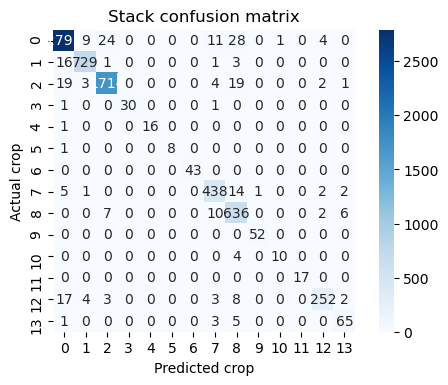

In [39]:
from sklearn.metrics import confusion_matrix
# # Print confusion matrix for stacking
rf_confusion = confusion_matrix(y_test, forest_tuned.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')

plt.xlabel('Predicted crop')
plt.ylabel('Actual crop')
plt.title('RF confusion matrix');

# plt.savefig("confusion_matrix_logit_iris")

In [40]:
def importances_plot(X,model):
    
    feature_imp=pd.DataFrame(list(zip(X.columns,model.feature_importances_))).sort_values(by=1,ascending=False)
    plt.figure(figsize=(15,8))
    sns.barplot(feature_imp[1],feature_imp[0],palette="RdYlGn_r",orient="h")
    plt.xticks(rotation=90)
    plt.title("Importancia de variables", fontsize=12)
    plt.xlabel("Importancia %")
    plt.ylabel("Variables")
    plt.show()

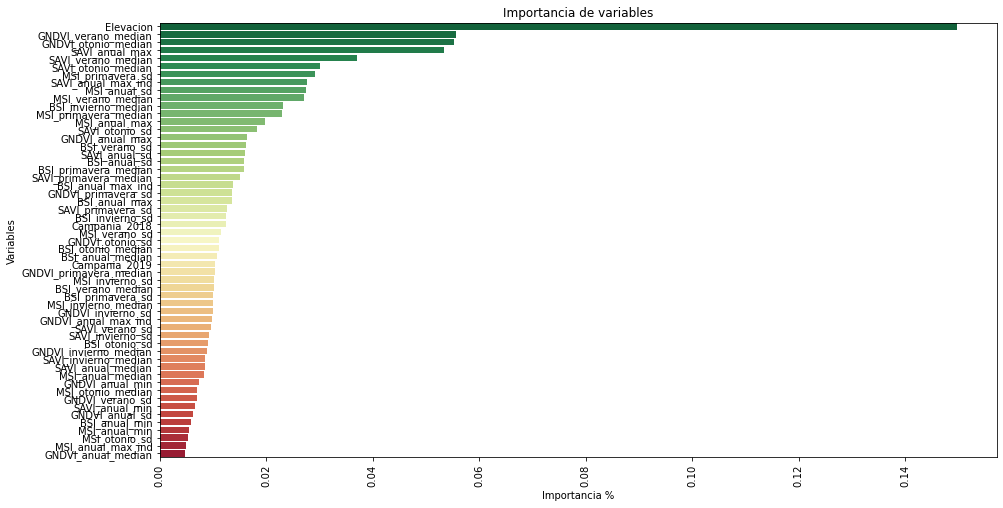

In [41]:
importances_plot(X_train,forest_tuned)

## MLP

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10000, alpha=0.0001,
                     solver='sgd',  random_state=21,tol=0.00001)

In [66]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9400430361530603

In [67]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98      2868
         2.0       0.97      0.97      0.97       750
         3.0       0.98      0.97      0.98      1762
         4.0       0.97      0.91      0.94        32
         5.0       1.00      0.94      0.97        17
         7.0       1.00      1.00      1.00         9
         8.0       0.98      1.00      0.99        43
         9.0       0.90      0.94      0.92       463
        10.0       0.91      0.93      0.92       661
        11.0       0.96      0.94      0.95        52
        15.0       0.92      0.79      0.85        14
        19.0       1.00      1.00      1.00        17
        23.0       0.92      0.87      0.90       289
        24.0       0.87      0.93      0.90        74

    accuracy                           0.96      7051
   macro avg       0.95      0.94      0.95      7051
weighted avg       0.96      0.96      0.96      7051



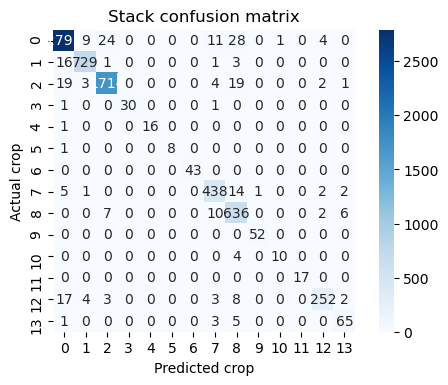

In [68]:
# # Print confusion matrix for stacking
stack_confusion = confusion_matrix(y_test, clf.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')

plt.xlabel('Predicted crop')
plt.ylabel('Actual crop')
plt.title('MLP confusion matrix');

# plt.savefig("confusion_matrix_logit_iris")

### Stacking

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
#from mlxtend.classifier import StackingClassifier

Una alternativa para enfrentar mejor el severo desbalance de clases es el stacking. En lugar de trabajar con clases, usaremos distintos modelos para estimar probabilidades de cada una de las clases y luego éstas probabilidades serán combinadas para obtener el resultado final. 

In [76]:
def get_models():
    models = dict()
    models['lr'] = make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=42), LogisticRegression(max_iter=1000))
    models['knn'] = KNeighborsClassifier(n_jobs = 6)
    models['cart'] = DecisionTreeClassifier()
    models['ert'] = ExtraTreesClassifier()
    models['svm'] = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
    models['rf'] = make_pipeline_with_sampler(preprocessor_tree, RandomOverSampler(random_state=42), RandomForestClassifier(random_state=42, n_jobs=2))
    models['xgb'] = XGBClassifier(n_jobs = 6)
    return models

In [77]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [78]:
from sklearn import preprocessing
# encode string class values as integers
label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(labels)
label_encoded_y_train = label_encoder.transform(y_train)
label_encoded_y_test = label_encoder.transform(y_test)

>lr 0.839 (0.011)
>knn 0.904 (0.015)
>cart 0.835 (0.025)
>ert 0.932 (0.010)
>svm 0.615 (0.017)
>rf 0.920 (0.016)
>xgb 0.919 (0.019)


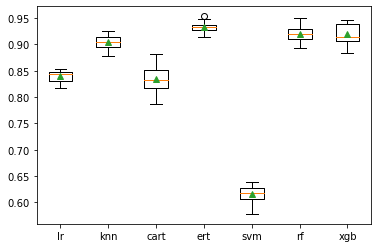

In [79]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, label_encoded_y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Se observa que las distintas alternativas arrojaron resultados bueno a excepción de SVM que tuvo una performance marcadamente inferior por lo que será excluida del stack. 

In [81]:
# define the base models
level0 = list()
level0.append(('lr', make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=42), LogisticRegression(max_iter=1000))))
level0.append(('knn', KNeighborsClassifier(n_jobs = 6)))
level0.append(('cart', DecisionTreeClassifier()))
#level0.append(('svm', SVC()))
level0.append(('rf', make_pipeline_with_sampler(preprocessor_tree, RandomOverSampler(random_state=42), RandomForestClassifier(random_state=42, n_jobs=2))))
level0.append(('etr', ExtraTreesClassifier(n_jobs = 6)))
level0.append(('xgb', XGBClassifier(n_jobs = 6)))
level0.append(('ml', MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10000, alpha=0.0001,
                     solver='sgd',  random_state=21,tol=0.00001)))

In [82]:
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5, n_jobs = -1) 
                           #compute_scores = True, verbose = 2, scoring = 'balanced_accuracy')
# fit the model on all available data
model.fit(X_train, label_encoded_y_train)

/Users/alessiobocco/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('lr',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(n_jobs=2,
                                                                   transformers=[('num-pipe',
                                                                                  Pipeline(steps=[('standardscaler',
                                                                                                   StandardScaler()),
                                                                                                  ('simpleimputer',
                                                                                                   SimpleImputer(add_indicator=True))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7fe9958d90>),
                                        

In [83]:
clf_score_stack = balanced_accuracy_score(label_encoded_y_test, model.predict(X_test))

print('Stack', clf_score_stack)

Stack 0.9748891760702703


In [84]:
print(classification_report(label_encoded_y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2868
           1       0.99      0.98      0.98       750
           2       0.99      0.99      0.99      1762
           3       1.00      0.94      0.97        32
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        43
           7       0.97      0.98      0.98       463
           8       0.98      0.98      0.98       661
           9       0.98      1.00      0.99        52
          10       1.00      0.86      0.92        14
          11       1.00      1.00      1.00        17
          12       0.99      0.96      0.97       289
          13       0.99      0.97      0.98        74

    accuracy                           0.99      7051
   macro avg       0.99      0.97      0.98      7051
weighted avg       0.99      0.99      0.99      7051



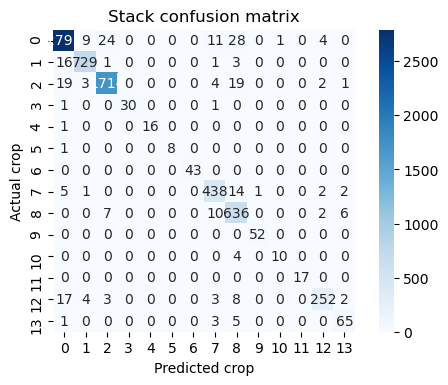

In [86]:
# # Print confusion matrix for stacking
stack_confusion = confusion_matrix(label_encoded_y_test, model.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g')

plt.xlabel('Predicted crop')
plt.ylabel('Actual crop')
plt.title('Stack confusion matrix');

# plt.savefig("confusion_matrix_logit_iris")

In [93]:
y_test_pred = model.predict(test)
y_test_pred = label_encoder.inverse_transform(y_test_pred)
y_test_pred = y_test_pred.astype(int)
submit = original_df[original_df.train == False]
submission = pd.DataFrame(list(zip(submit.GlobalId, y_test_pred)), columns=["GlobalId", "CultivoId"])
submission.head()

,GlobalId,CultivoId
0,2,3
1,3,3
2,5,3
3,8,10
4,11,10


In [94]:
np.unique(y_test_pred)

array([ 1,  2,  3,  4,  8,  9, 10, 23, 24])

In [95]:
submission.to_csv("../prueba.csv", header=False, index=False)